In [3]:
### Importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing sciKit-learn stuff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv('train.csv')

### Let's start exploring the data

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


I'd like lower the column titles. It's easier to work with so

In [50]:
df.columns= df.columns.str.lower()

In [53]:
#df

In [51]:
df.shape

(891, 12)

In [55]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [58]:
sns.set_style('whitegrid')

### First things first. Let's have a look at the numbers of survivors and deaths

<AxesSubplot:xlabel='survived', ylabel='count'>

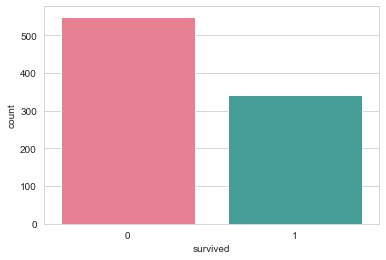

In [54]:
sns.countplot(x='survived',data=df, palette = "husl")

### Let's check the profile of passengers in terms of gender, age, being survived etc.

<AxesSubplot:xlabel='survived', ylabel='count'>

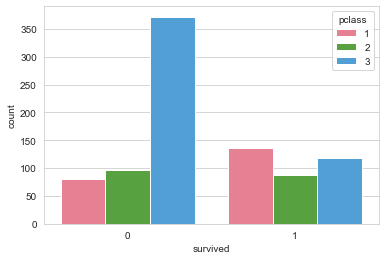

In [60]:
sns.countplot(x='survived', data=df, hue='pclass', palette='husl')

It is expected that the most of the deaths are from the 3rd class.

<AxesSubplot:xlabel='age', ylabel='Count'>

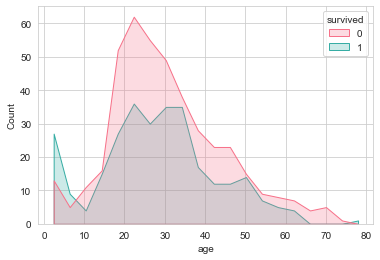

In [66]:
sns.histplot(x='age', data=df, hue='survived', palette='husl', element='poly')

The dominance of the survivors in the lower region of the plot confirms that during the evacuation children were prioritised.

<AxesSubplot:xlabel='survived', ylabel='count'>

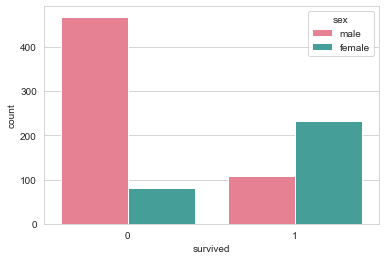

In [62]:
sns.countplot(x='survived', data=df, hue='sex', palette='husl')

This is also kind of expected that a big proportion of the survivors is female. Since females and children are prioritised.

<AxesSubplot:xlabel='sibsp', ylabel='count'>

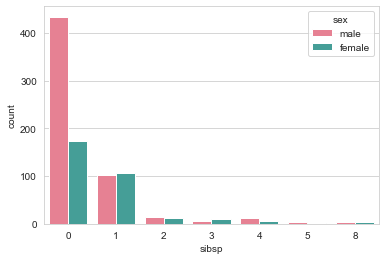

In [69]:
sns.countplot(x='sibsp',data=df, hue='sex', palette='husl')

From the sibling & spouse profile of the passengers it can be inferred that most of the passengers have neither a sibling nor a spouse and again as can be inferred from the plot, those who don't have a sibling/spouse are mostly bachelor men who were travelling to the US for a new job probably.

<AxesSubplot:xlabel='fare', ylabel='Count'>

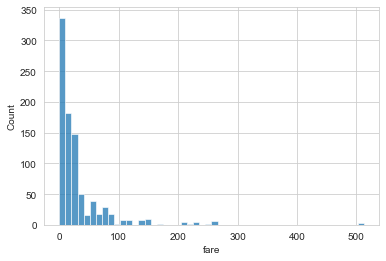

In [81]:
sns.histplot(x='fare', data=df, bins=50, palette='husl')

Since most of the passengers were travelling in class 3 or 2, the fare distribution of the passengers has the shape of exponential fall as expected.

### Alright. Now let's have a look at the dataframe itself. Feature types, NaN values, etc.

In [84]:
df.head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

A remarkable number of passengers are without age information. Since passenger age is an important feature for being a survived or dead we can't simply drop these NaN values.

On the other hand, cabin columns holds only the information of cabin number. This plays no role in terms of surviving. Thus this column can be dropped.

The two two rows with missing embarked information can also be droped since it's just a few.

### -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

With a simple and a bit bold logic it can be concluded that the older the passengers are the wealthier they are and in turn the higher class ticket they can afford. So it wouldn't be a bad idea to consider the mean age per class when filling NaN vales in the age column.

In [90]:
round(df.groupby('pclass')['age'].mean(),1)

pclass
1    38.2
2    29.9
3    25.1
Name: age, dtype: float64

So the NaN age values will be filled by the mean age of the class in which that person is whose age information is missing. Above are the calculated mean ages for each class.

In [95]:
def fillna_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [96]:
df['age'] = df[['age','pclass']].apply(fillna_age,axis=1)

Let's generate a heatmap of the dataframe concerning the NaN values:

<AxesSubplot:>

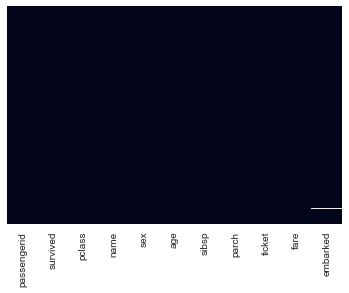

In [100]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

The only NaN values are those two embarked values. We can now simply run dropna() function for the whole dataframe since they are the only NaN values.

In [102]:
df.dropna(inplace=True)

In [88]:
#df.drop('cabin',axis=1,inplace=True)